In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

RAW = Path("../data/raw")
ASSETS = Path(f'../assets/majestic-1000')
CHART_FILE_EXTENSION = ".svg"

In [2]:
color_cycle = sns.color_palette("Set2")
bar_width = .75
sns.set(rc = {'figure.figsize':(12,6)})
sns.set_theme(style='white')
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [3]:
cookies = []
for path in RAW.glob("*/*/*/Cookies.sqlite"):
    with sqlite3.connect(path) as con:
        cookie = pd.read_sql_query("SELECT * from cookies", con)
    request = path.parent.parent / "request.txt"
    with open(request) as f:
        request = f.read().strip()
    study_name = path.parent.name
    
    cookie["request"] = request
    cookie["study_name"] = study_name
    cookies.append(cookie)
        
cookies = pd.concat(cookies, ignore_index=True)

In [4]:
from tld import get_fld

is_tp = lambda row: get_fld(row["host_key"].strip('.'), fix_protocol=True) != get_fld(row["request"], fix_protocol=True)
cookies["is_tp"] = cookies.apply(is_tp, axis=1)

cookies.head()

,creation_utc,host_key,top_frame_site_key,name,value,encrypted_value,path,expires_utc,is_secure,is_httponly,...,is_persistent,priority,samesite,source_scheme,source_port,is_same_party,last_update_utc,request,study_name,is_tp
0,13308054541351722,.mozilla.org,,_ga,GA1.2.483913409.1663580941,b'',/,13342614541351681,0,0,...,1,1,-1,2,443,0,13308054541351722,https://mozilla.org,without-cookie,False
1,13308054542023570,.mozilla.org,,_ga_MQ7767QQQW,GS1.1.1663580941.1.0.1663580942.0.0.0,b'',/,13342614542023529,0,0,...,1,1,-1,2,443,0,13308054542023570,https://mozilla.org,without-cookie,False
2,13308054541372575,.mozilla.org,,_gat_UA-36116321-1,1,b'',/,13308054601000000,0,0,...,1,1,-1,2,443,0,13308054541372575,https://mozilla.org,without-cookie,False
3,13308054541354875,.mozilla.org,,_gid,GA1.2.977240478.1663580941,b'',/,13308140941000000,0,0,...,1,1,-1,2,443,0,13308054541354875,https://mozilla.org,without-cookie,False
4,13308054541372575,.mozilla.org,,_gat_UA-36116321-1,1,b'',/,13308054601000000,0,0,...,1,1,-1,2,443,0,13308054541372575,https://mozilla.org,with-cookie,False


In [5]:
def set_sns_barsize(ax, size):
    for bar in ax.patches:
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width/2.

        bar.set_x(centre-size/2.)
        bar.set_width(size)

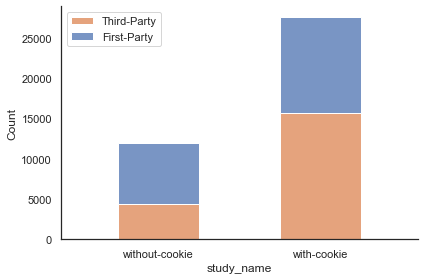

In [6]:
plt.figsize=(5,5)
ax = sns.histplot(x='study_name', hue='is_tp', data=cookies, multiple="stack", legend=False)
set_sns_barsize(ax, 0.5)
plt.legend(["Third-Party", "First-Party"])
plt.tight_layout()

In [67]:
cookies["domain"] = cookies["host_key"].apply(lambda x: get_fld(x.strip('.'), fix_protocol=True))
dulp_cookies = cookies[(cookies[['study_name', 'value']].duplicated(keep=False)) & (cookies['value'].str.len() > 7) & cookies['value'].str.isnumeric()].drop_duplicates('domain').sort_values(by='value')
dulp_cookies = dulp_cookies[dulp_cookies['value'].duplicated(keep=False)]

In [69]:
dulp_cookies[~dulp_cookies['is_tp']]

,creation_utc,host_key,top_frame_site_key,name,value,encrypted_value,path,expires_utc,is_secure,is_httponly,...,priority,samesite,source_scheme,source_port,is_same_party,last_update_utc,request,study_name,is_tp,domain
9233,13308069313128889,slack.com,,visitor_id755253,1059298927,b'',/,13342629313128866,0,0,...,1,-1,2,443,0,13308069313128889,https://slack.com,with-cookie,False,slack.com
6987,13308067352239181,.trello.com,,atlUserHash,1393648548,b'',/,13342627352239162,0,0,...,1,-1,2,443,0,13308067352239181,https://trello.com,without-cookie,False,trello.com
12751,13308072191016312,.atlassian.com,,atlUserHash,1393648548,b'',/,13342632191016290,0,0,...,1,-1,2,443,0,13308072191016312,https://atlassian.com,without-cookie,False,atlassian.com
16599,13308078187637284,.bitbucket.org,,atlUserHash,1393648548,b'',/,13342638187637263,0,0,...,1,-1,2,443,0,13308078187637284,https://bitbucket.org,without-cookie,False,bitbucket.org
20488,13308079174602302,.wunderground.com,,notice_poptime,1533920400000,b'',/,13342207174000000,1,0,...,1,0,2,443,0,13308079174602302,https://wunderground.com,with-cookie,False,wunderground.com
36972,13308071876614933,.weather.com,,notice_poptime,1533920400000,b'',/,13342199876000000,1,0,...,1,0,2,443,0,13308071876614933,https://weather.com,with-cookie,False,weather.com
34480,13308063247872017,.nypost.com,,_cs_ex,1645376079,b'',/,13310655247000000,1,0,...,1,0,2,443,0,13308063247872017,https://nypost.com,with-cookie,False,nypost.com
35677,13308080411162202,www.esquire.com,,_pbjs_userid_consent_data,2189850536116144,b'',/,13310672437000000,0,0,...,1,1,2,443,0,13308080437263595,https://esquire.com,with-cookie,False,esquire.com
19129,13308082708281287,www.goodhousekeeping.com,,_pbjs_userid_consent_data,2189850536116144,b'',/,13310674733000000,0,0,...,1,1,2,443,0,13308082733071927,https://goodhousekeeping.com,with-cookie,False,goodhousekeeping.com
2185,13308059611216344,www.tandfonline.com,,visitor_id111042,2194187248,b'',/,13342619611216324,0,0,...,1,-1,2,443,0,13308059611216344,https://tandfonline.com,without-cookie,False,tandfonline.com


In [70]:
dulp_cookies_name = cookies[(cookies[['study_name', 'name']].duplicated(keep=False)) & (cookies['value'].str.len() > 7) & cookies['value'].str.isnumeric()].drop_duplicates('domain').sort_values(by='value')
dulp_cookies_name = dulp_cookies[dulp_cookies['name'].duplicated(keep=False)]

In [72]:
dulp_cookies_name[~dulp_cookies_name['is_tp']]

,creation_utc,host_key,top_frame_site_key,name,value,encrypted_value,path,expires_utc,is_secure,is_httponly,...,priority,samesite,source_scheme,source_port,is_same_party,last_update_utc,request,study_name,is_tp,domain
9233,13308069313128889,slack.com,,visitor_id755253,1059298927,b'',/,13342629313128866,0,0,...,1,-1,2,443,0,13308069313128889,https://slack.com,with-cookie,False,slack.com
6987,13308067352239181,.trello.com,,atlUserHash,1393648548,b'',/,13342627352239162,0,0,...,1,-1,2,443,0,13308067352239181,https://trello.com,without-cookie,False,trello.com
12751,13308072191016312,.atlassian.com,,atlUserHash,1393648548,b'',/,13342632191016290,0,0,...,1,-1,2,443,0,13308072191016312,https://atlassian.com,without-cookie,False,atlassian.com
16599,13308078187637284,.bitbucket.org,,atlUserHash,1393648548,b'',/,13342638187637263,0,0,...,1,-1,2,443,0,13308078187637284,https://bitbucket.org,without-cookie,False,bitbucket.org
20488,13308079174602302,.wunderground.com,,notice_poptime,1533920400000,b'',/,13342207174000000,1,0,...,1,0,2,443,0,13308079174602302,https://wunderground.com,with-cookie,False,wunderground.com
36972,13308071876614933,.weather.com,,notice_poptime,1533920400000,b'',/,13342199876000000,1,0,...,1,0,2,443,0,13308071876614933,https://weather.com,with-cookie,False,weather.com
35677,13308080411162202,www.esquire.com,,_pbjs_userid_consent_data,2189850536116144,b'',/,13310672437000000,0,0,...,1,1,2,443,0,13308080437263595,https://esquire.com,with-cookie,False,esquire.com
19129,13308082708281287,www.goodhousekeeping.com,,_pbjs_userid_consent_data,2189850536116144,b'',/,13310674733000000,0,0,...,1,1,2,443,0,13308082733071927,https://goodhousekeeping.com,with-cookie,False,goodhousekeeping.com
2185,13308059611216344,www.tandfonline.com,,visitor_id111042,2194187248,b'',/,13342619611216324,0,0,...,1,-1,2,443,0,13308059611216344,https://tandfonline.com,without-cookie,False,tandfonline.com
32551,13308082993894492,www.howtogeek.com,,_pbjs_userid_consent_data,2649029709483611,b'',/,13310675021000000,0,0,...,1,1,2,443,0,13308083021507008,https://howtogeek.com,with-cookie,False,howtogeek.com
